In [42]:
import h5py
import numpy as np
import mne
import os

# Path to your HDF5 file
h5_file = os.path.abspath('../DataProcessed/eeg_data.h5')

with h5py.File(h5_file, 'r') as f:
    # Print all top-level keys (groups or datasets)
    print("Top-level keys:", list(f.keys()))
    
    # Recursively print all names in the file
    def print_name(name):
        print(name)
    
    f.visit(print_name)


Top-level keys: ['311A', '313C', '314B', '315A', '318B', '322A', '323B', '324C', '326A', '328C']
311A
311A/epochs
313C
313C/epochs
314B
314B/epochs
315A
315A/epochs
318B
318B/epochs
322A
322A/epochs
323B
323B/epochs
324C
324C/epochs
326A
326A/epochs
328C
328C/epochs


In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'ocean'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.ocean(np.linspace(0, 1, 64)))

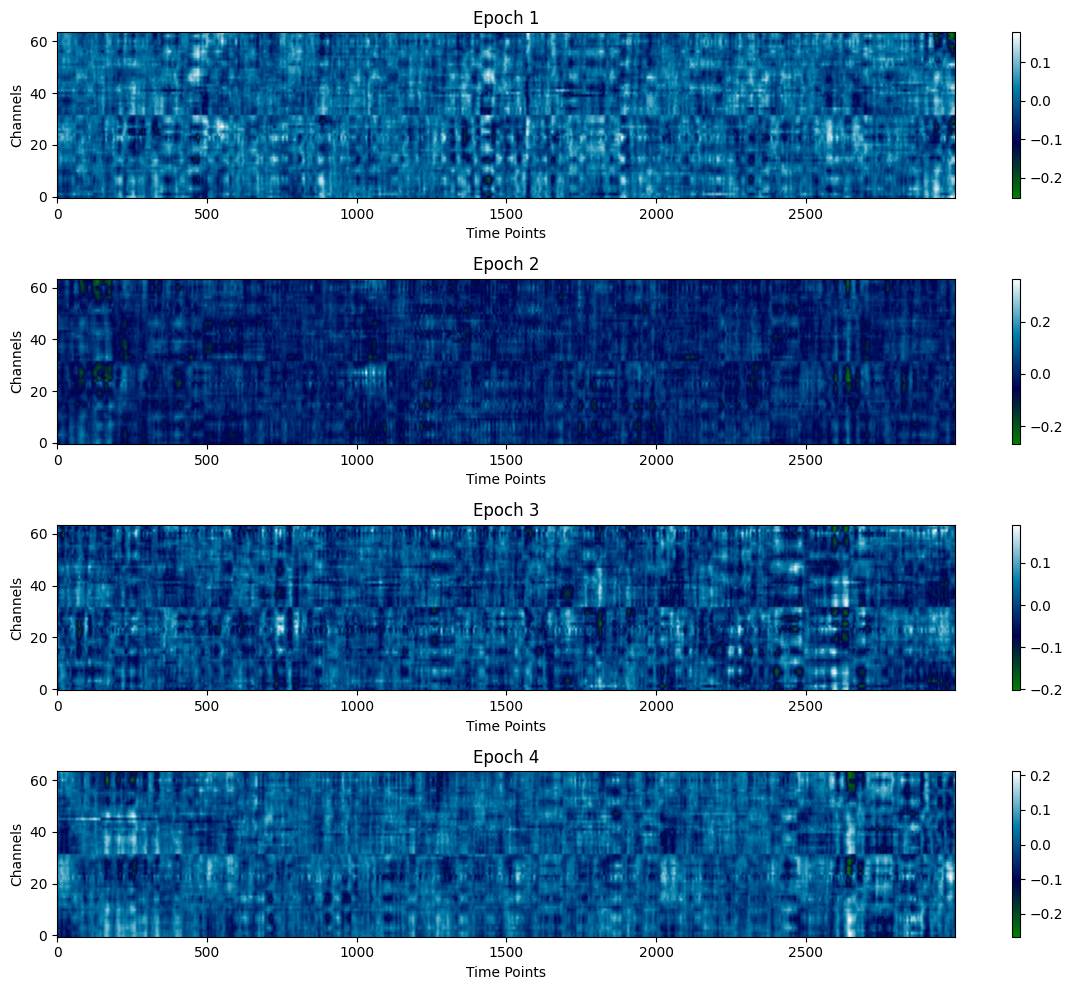

In [54]:
# Specify the participant ID (change this to one of the keys in your HDF5 file)
participant_id = '311A'  # e.g., '001' or any valid ID

with h5py.File(h5_file, 'r') as h5file:
    # Check if the participant exists in the file
    if participant_id in h5file:
        # Access the participant group and load the 'epochs' dataset
        epochs = h5file[participant_id]['epochs']  # shape: (n_epochs, n_channels, n_timepoints)
        # Get the first four epochs
        first_four = epochs[0:4]
    else:
        raise ValueError(f"Participant ID '{participant_id}' not found in the HDF5 file.")

# Plot the first four epochs
fig, axs = plt.subplots(4, 1, figsize=(12, 10))

for i, epoch in enumerate(first_four):
    # Display the epoch as a heatmap where:
    # - X-axis represents time points.
    # - Y-axis represents EEG channels.
    im = axs[i].imshow(epoch, aspect='auto', origin='lower')
    axs[i].set_title(f'Epoch {i+1}')
    axs[i].set_xlabel('Time Points')
    axs[i].set_ylabel('Channels')
    fig.colorbar(im, ax=axs[i], orientation='vertical')

plt.tight_layout()
plt.show()

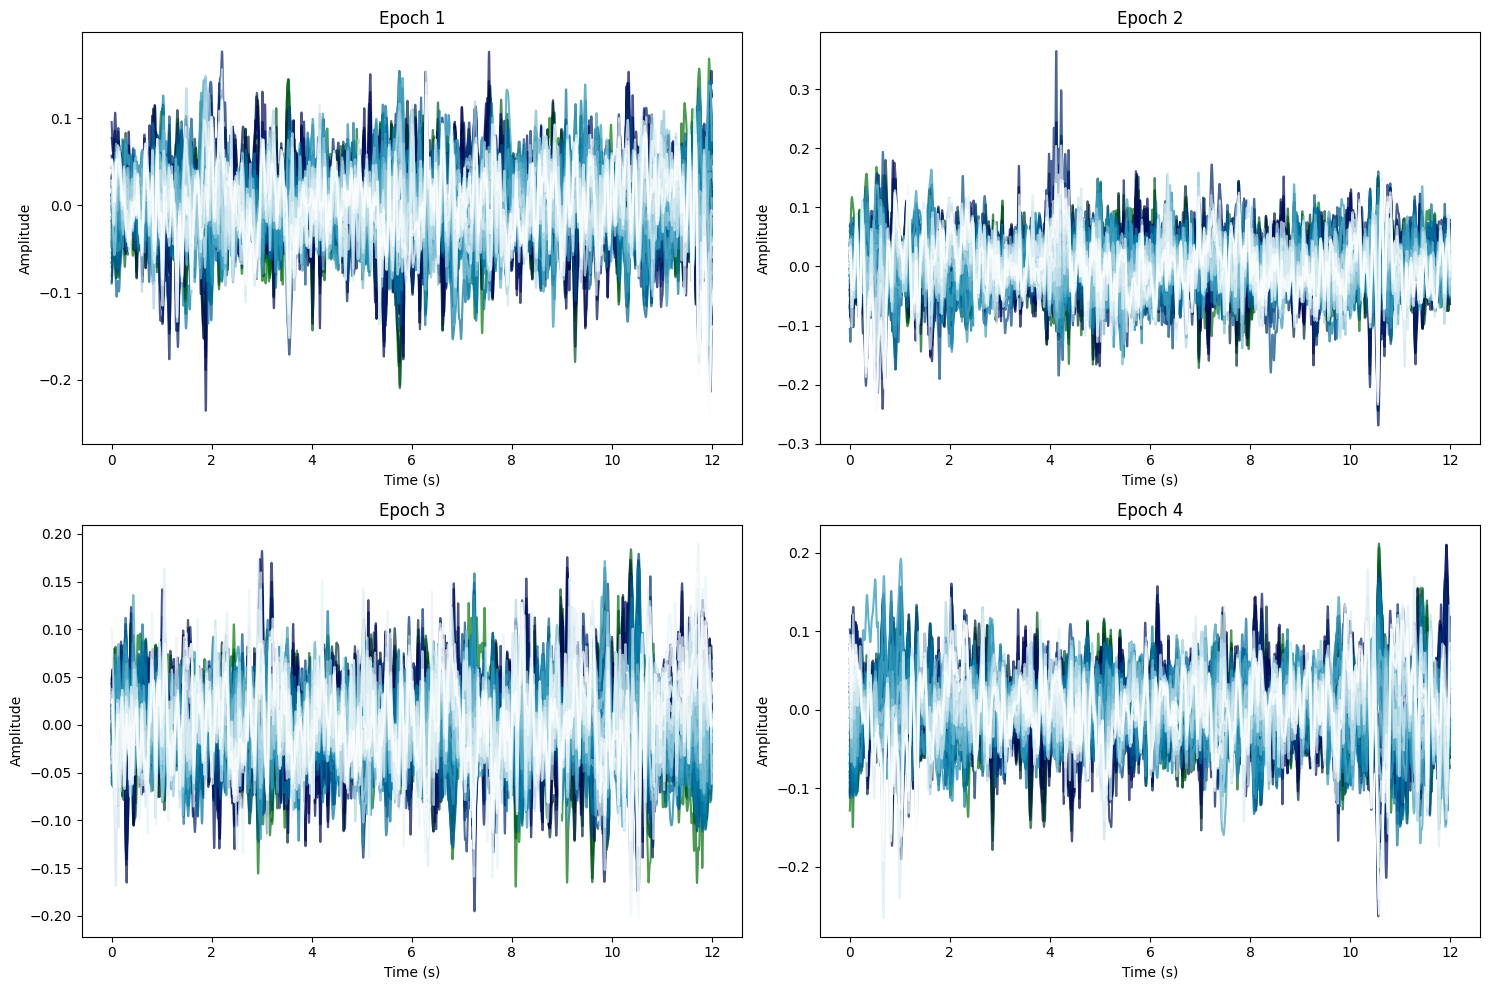

In [45]:
# Parameters
participant_id = '311A'  # Replace with an actual participant ID (e.g., '001')
sfreq = 250.0  # Adjust to your sampling frequency

# Load the first four epochs from the HDF5 file for the given participant
with h5py.File(h5_file, 'r') as f:
    if participant_id in f:
        # Assuming dataset shape is (n_epochs, n_channels, n_timepoints)
        epochs_data = f[participant_id]['epochs'][:]  
        first_four_epochs = epochs_data[0:4]
    else:
        raise ValueError(f"Participant ID '{participant_id}' not found in the HDF5 file.")

# Get basic info from the data
n_epochs, n_channels, n_timepoints = first_four_epochs.shape
times = np.arange(n_timepoints) / sfreq  # time vector in seconds

# Create subplots for the four epochs (2 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, epoch in enumerate(first_four_epochs):
    ax = axes[i]
    # Plot each channel's time series as a line
    for ch in range(n_channels):
        ax.plot(times, epoch[ch, :], label=f'Ch {ch+1}', alpha=0.7)
    ax.set_title(f'Epoch {i+1}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    # Uncomment the line below if you have a small number of channels and want a legend
    # ax.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()


Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Effective window size : 1.024 (s)


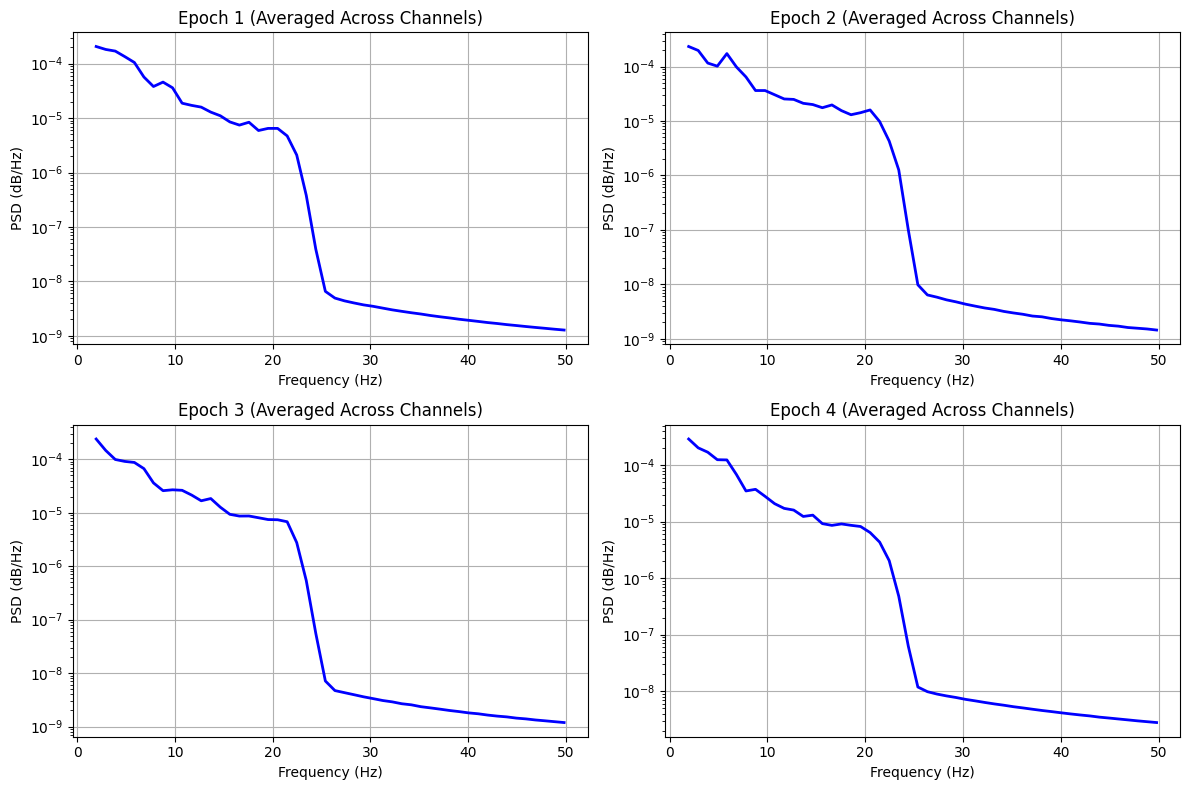

In [55]:
from mne.time_frequency import psd_array_welch  # Use this instead of psd_welch

# Parameters (adjust as needed)
participant_id = '311A'  # Replace with an actual participant ID from your HDF5 file
sfreq = 250.0  # Set your sampling frequency
fmin, fmax = 1, 50  # Frequency range for the PSD

# Load the first four epochs from the HDF5 file for the given participant
with h5py.File(h5_file, 'r') as f:
    if participant_id in f:
        # Assuming the dataset is stored as (n_epochs, n_channels, n_timepoints)
        epochs_data = f[participant_id]['epochs'][:4]
    else:
        raise ValueError(f"Participant ID '{participant_id}' not found in the HDF5 file.")

# Get basic information from the data
n_epochs, n_channels, n_timepoints = epochs_data.shape

# Create channel names (modify if you have real channel labels)
ch_names = [f'EEG{i+1}' for i in range(n_channels)]
ch_types = ['eeg'] * n_channels

# Create an MNE Info object and then an EpochsArray object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
epochs = mne.EpochsArray(epochs_data, info, tmin=0)

# Use psd_array_welch on the raw data array from the Epochs object.
# This function expects an array of shape (n_epochs, n_channels, n_times)
data = epochs.get_data()
psds, freqs = psd_array_welch(data, sfreq=sfreq, fmin=fmin, fmax=fmax, n_overlap=1, window="hamming")

# Option: Average the PSD across channels for each epoch
mean_psds = psds.mean(axis=1)  # resulting shape: (n_epochs, n_freqs)

# Create subplots for the 4 epochs (2 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    
    ax.semilogy(freqs, mean_psds[i], color='b', lw=2)
    ax.set_title(f'Epoch {i+1} (Averaged Across Channels)')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('PSD (dB/Hz)')
    ax.grid(True)

plt.tight_layout()
plt.show()


Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Effective window size : 1.024 (s)


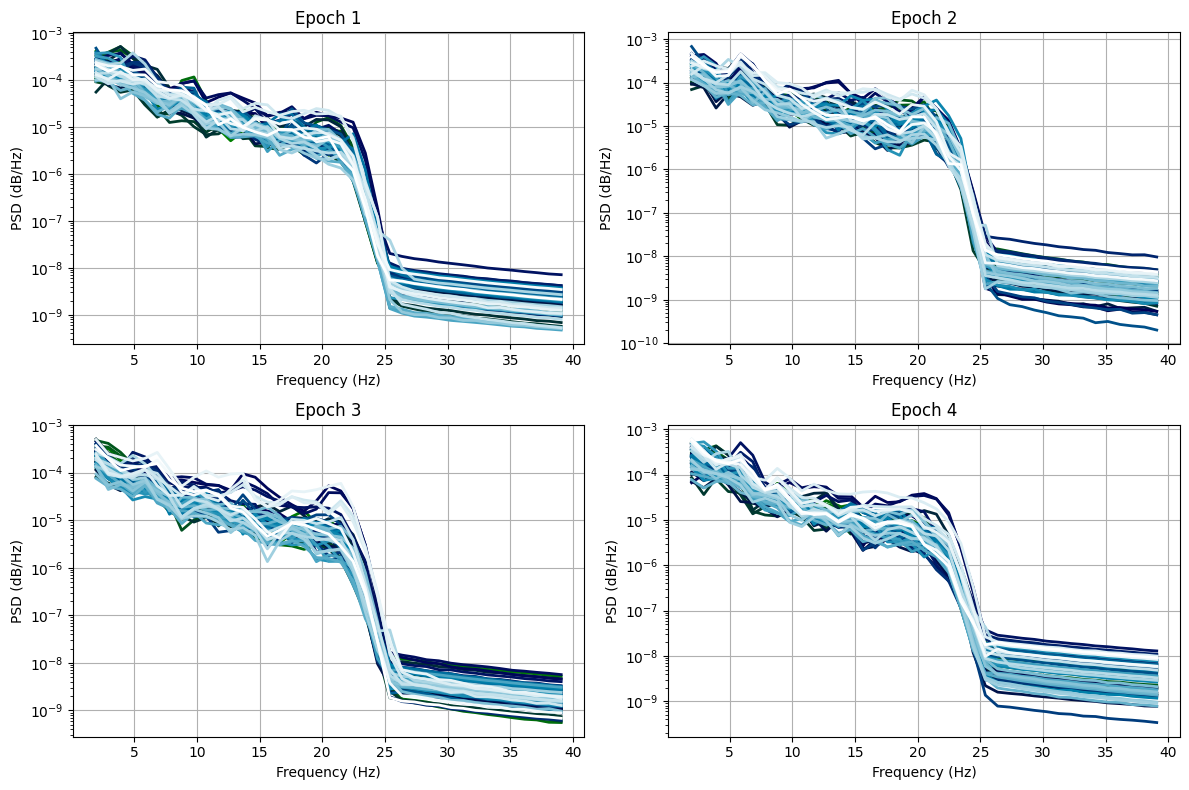

In [47]:
# Parameters (adjust as needed)
participant_id = '311A'  # Replace with an actual participant ID from your HDF5 file
sfreq = 250.0  # Set your sampling frequency
fmin, fmax = 1, 40  # Frequency range for the PSD

# Load the first four epochs from the HDF5 file for the given participant
with h5py.File(h5_file, 'r') as f:
    if participant_id in f:
        # Assuming the dataset is stored as (n_epochs, n_channels, n_timepoints)
        epochs_data = f[participant_id]['epochs'][:4]
    else:
        raise ValueError(f"Participant ID '{participant_id}' not found in the HDF5 file.")

# Get basic information from the data
n_epochs, n_channels, n_timepoints = epochs_data.shape

# Create channel names (modify if you have real channel labels)
ch_names = [f'EEG{i+1}' for i in range(n_channels)]
ch_types = ['eeg'] * n_channels

# Create an MNE Info object and then an EpochsArray object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
epochs = mne.EpochsArray(epochs_data, info, tmin=0)

# Use psd_array_welch on the raw data array from the Epochs object.
# This function expects an array of shape (n_epochs, n_channels, n_times)
data = epochs.get_data()
psds, freqs = psd_array_welch(data, sfreq=sfreq, fmin=fmin, fmax=fmax, n_overlap=1, window="hamming")

# Create subplots for the 4 epochs (2 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    for j,psd in enumerate(psds[i]):
        ax.semilogy(freqs, psd, lw=2)
    ax.set_title(f'Epoch {i+1}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('PSD (dB/Hz)')
    ax.grid(True)

plt.tight_layout()
plt.show()

What to do:
- maybe specify a region of channels to display